# Plotting a vector field

### S I - Streamlines

The task is to plot the streamlines of non-dimensional SIR system.
We are interested in the amount of suscpectible and infected individuals during the epidemy.
Notice, that the $R$ compartment can be eradicated thanks to the $R = N -I -S$ constraint.

\begin{align*}
\frac{\partial}{\partial \tau} s &= - R_0 s i \\
\frac{\partial}{\partial \tau} i &= R_0 s i -  i \\
\frac{\partial}{\partial \tau} r &= i
\end{align*}

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab


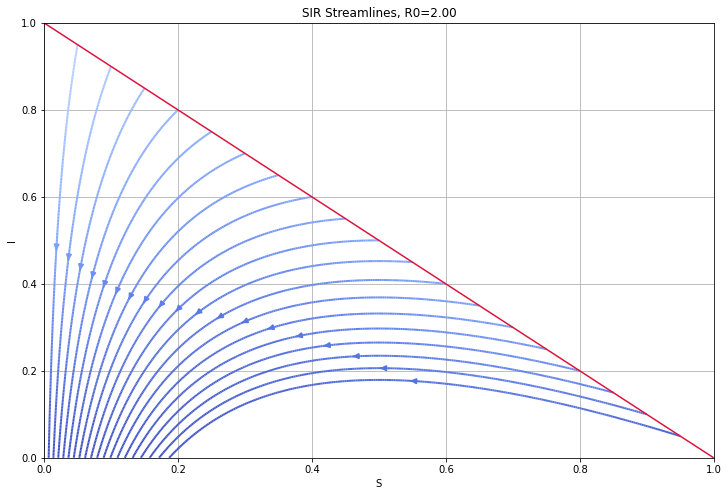

In [13]:

x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)

S, I = np.meshgrid(x, y) # X, Y = np.meshgrid(x, y)

beta = 0.71      # number of contacts per day 
gamma = 1/2.8    # 1 over days to recovery
R0 = beta/gamma  # basic reproduction number
R0 = 2
N = 1e0  # Size of population [no of people].

dS = -R0*I*S/N
dI = R0*I*S/N - I


# Creating plot
fig = plt.figure(figsize = (12, 8))
magnitude = np.sqrt(dS**2 + dI**2)
stream_points = [(x,1-x) for x,y in zip(np.arange(0,1,0.05),np.arange(0,1,0.05))]  
# stream_points = [(0.25, x) for x,y in zip(np.arange(0,0.2,0.01), np.arange(0,0.2,0.01))] 
# stream_points = [(x, 1e-6) for x,y in zip(np.arange(0,1,0.025), np.arange(0,1,0.025))]  # take a closer look at 'small perturbation (~0) of I' along S axis

strmS = plt.streamplot(S, I, dS, dI, start_points=stream_points, color=magnitude, cmap=plt.cm.coolwarm, linewidth=2, density=10, 
                       integration_direction='forward') # integration_direction='forward'


plt.plot(np.arange(0,1,1e-3), 1-np.arange(0,1,1e-3), color="crimson")

plt.title(f'SIR Streamlines, R0={R0:.2f}')
plt.xlabel('S')
plt.ylabel('I')
plt.grid(True)
plt.show()


## Task

Experiment with different R0 values, for example $R0 \in [0.01, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0] $

Consider the following case:

```
R0 = 4
stream_points = [(0.25, x) for x,y in zip(np.arange(0,0.2,0.01), np.arange(0,0.2,0.01))] 
and
stream_points = [(x, 1e-6) for x,y in zip(np.arange(0,1,0.025), np.arange(0,1,0.025))] # small perturbation of I
```

The Herd Immunity Treshold (HIT) $ \approx 75 \%$, for R0 = 4 and HIT $\approx 50 \%$, for R0 = 2.

Observe it using the streamlines plot. 

# Repetition - time domain

Let us re-use the result obtained in part1 (time integration of 0D SIR equations). 
Eradicate the time and plot one of the streamlines in S-I domain.

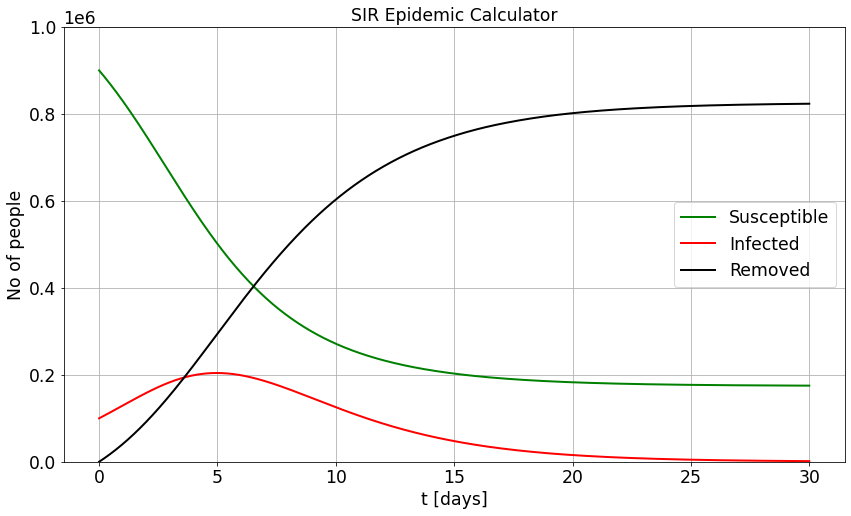

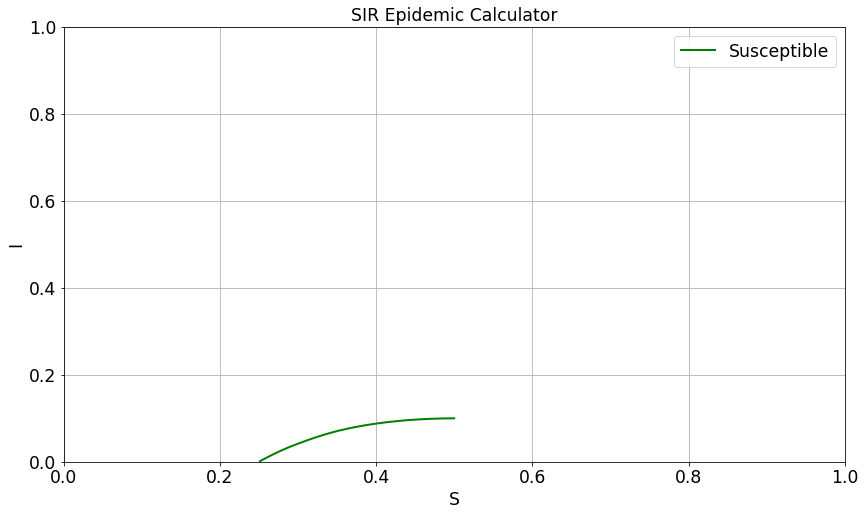

In [3]:
# from ipynb.fs.full.<notebook_name> import <function_name>
from ipynb.fs.full.part1_SIR_0D_SOLUTION import SIR_0D

# INITIAL CONDItIONS
initial_susceptible = 0.5*N  # initial number of susceptible individuals in population.
initial_infections = 1e-1*N  # initial number of infected individuals in population.
# try: initial_infections = 1e-2*N  # initial number of infected individuals in population.
initial_removed = initial_susceptible-initial_infections  # initial number of removed (recovered) individuals in population.
IC = np.array([initial_susceptible, initial_infections, initial_removed])

days_to_simulate = 30
sol = solve_ivp(SIR_0D,
                [0, days_to_simulate],
                IC,
                method='RK45',
                args=[beta, gamma, N],
                dense_output=True)

t = np.linspace(0, days_to_simulate, 1000)
z = sol.sol(t)

S, I, R = z


params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (14, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
axes = plt.gca()

# plt.plot(t, S,
#          color="green", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
#          label='Susceptible')
# plt.plot(t, I,
#          color="red", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
#          label='Infected')
# plt.plot(t, R,
#          color="black", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
#          label='Removed')
# plt.xlabel('t [days]')
# plt.ylabel('No of people')

plt.plot(S, I,
         color="green", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
         label='Susceptible')
axes.set_xlim(0, 1)
axes.set_ylim(0, 1)
plt.xlabel('S')
plt.ylabel('I')

plt.title('SIR Epidemic Calculator')
plt.legend()
plt.grid()
plt.show()


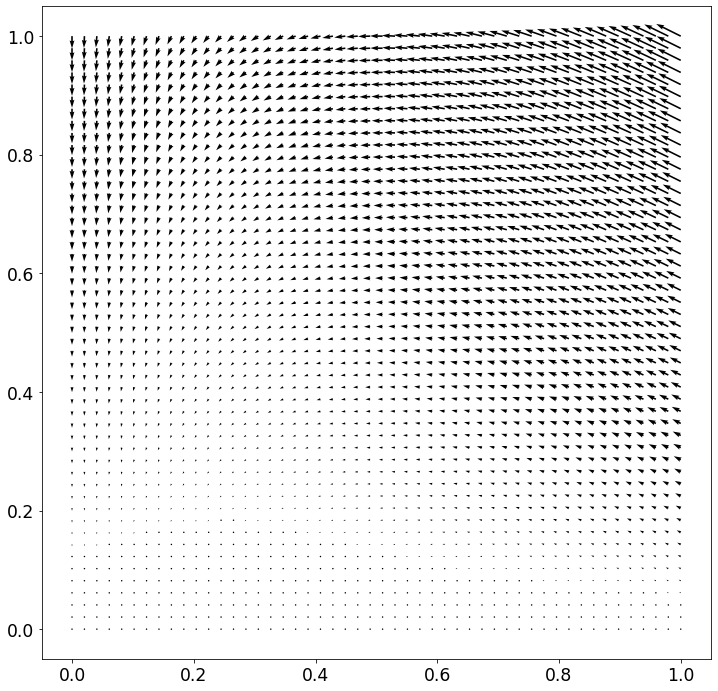

In [123]:
# A vector plot

plt.figure(figsize=(12, 12))
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.quiver(S, I, dS, dI)
plt.show()

# Remarks

In case of reinfections (transfer from $R$ to $S$), cycles in SIR the trajecties can be expected.

# Inspirations

<https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.15-Quiver-and-Stream-Plots/>
